<a href="https://colab.research.google.com/github/hyunBBB/OMG/blob/main/12_VGG16_implementation_dogsandcats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [8]:
cd MyDrive/My Drive/CV_exprt/CNN

[Errno 2] No such file or directory: 'MyDrive/My Drive/CV_exprt/CNN'
/content/MyDrive/My Drive/CV_exprt


In [1]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [10]:
trdata = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split=0.2)


traindata = trdata.flow_from_directory(directory="./dogsandcats",   target_size=(224,224), subset='training')

valdata = trdata.flow_from_directory(directory="./dogsandcats",   target_size=(224,224),subset="validation" ,)




FileNotFoundError: ignored

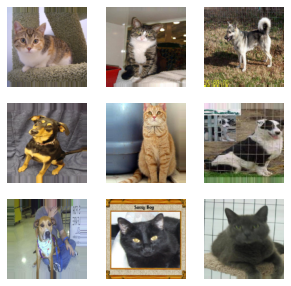

In [ ]:
import matplotlib.pyplot as plt

x_train, y_train = traindata.next()
plt.figure(figsize=(5, 5))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    plt.axis("off")

VGG Architecture

https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16

In [2]:
import tensorflow as tf

VGG = tf.keras.applications.VGG16(input_shape = (224,224,3), include_top = False, weights = 'imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [4]:
VGG.trainable = True

#  피피티 자료에서 첫번째 방법 vgg첫번째 그거 // 0.93이고 어큐레이씨가

In [11]:
# VGG.trainable = False
# 하고 서머리 하면 학습 ㄱ가능한게 0으로 뜨는것임
# 타입 투로 할 때는 펄스로 해야지. e두번째 방법!!!!!!!!!!!!!! 어큐레이씨 0.86

In [5]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,203,778
Trainable params: 21,203,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = Sequential()

# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(units=256,activation="relu"))
# model.add(Dense(units=256,activation="relu"))
# model.add(Dense(units=2, activation="softmax"))


### VGG + Classifier

In [9]:
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))

In [8]:

adam = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
history = model.fit(traindata, epochs = 10,   validation_data=valdata,)

NameError: ignored

In [12]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored